# Image Compression

In [1]:
from PIL import Image
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
gaussimg = Image.open(r"data/gauss.jpg")
gaussimg = gaussimg.resize((1024,1024))

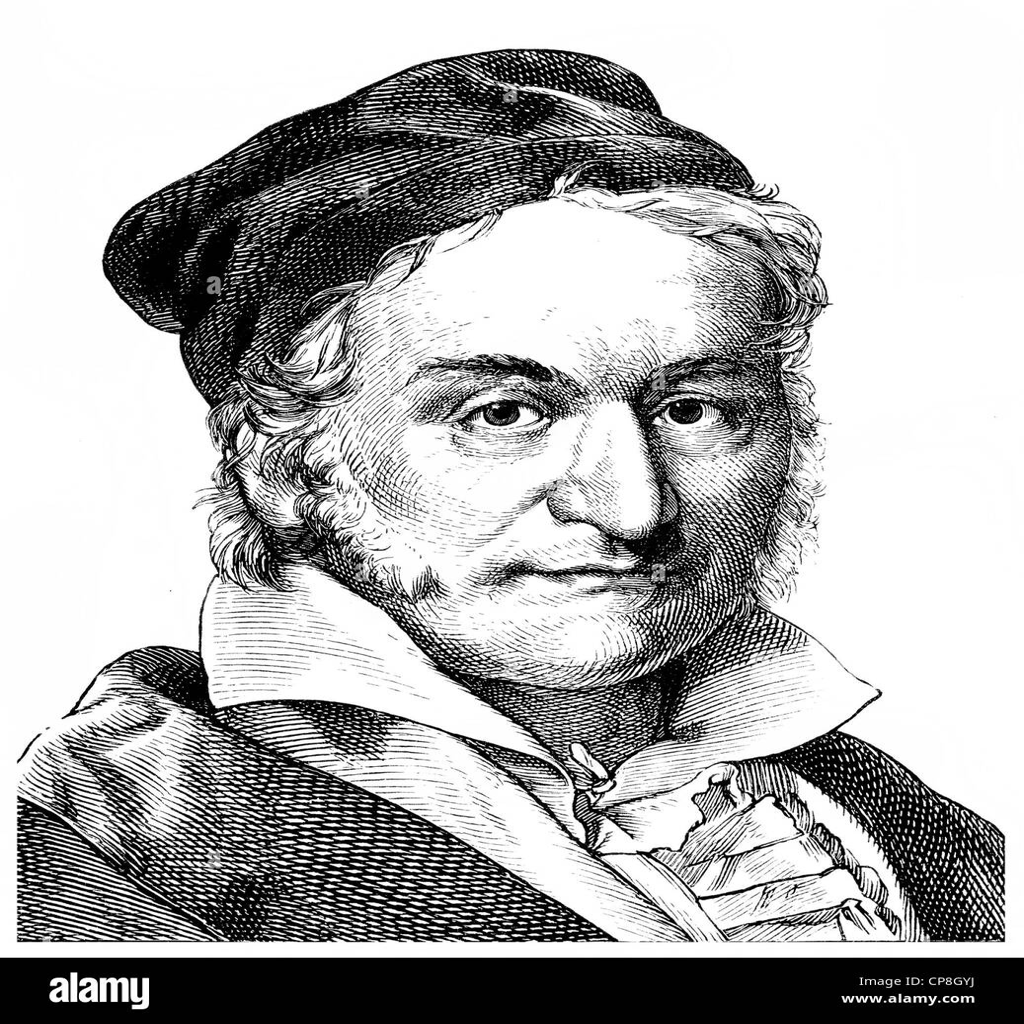

In [3]:
grayscale = gaussimg.convert("L")
mat = np.array(grayscale)
grayscale

In [4]:
U, S, VT = np.linalg.svd(grayscale)

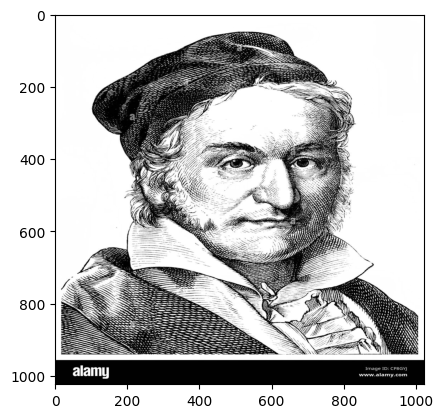

In [5]:
mat = U @ np.diag(S) @ VT
plt.imshow(mat, cmap='gray')

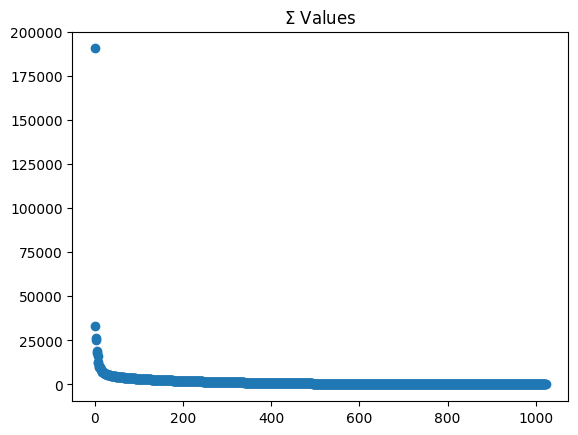

In [6]:
x = range(1024)
y = S

plt.title("$\Sigma$ Values")

plt.scatter(x, y)
plt.show()

In [7]:
threshold = 1200
idx = 0
for i in range(len(S)):
    if S[i] < threshold:
        idx = i
        break
x1 = range(0, idx)
x2 = range(idx, 1024)
y1 = S[:idx]
y2 = S[idx:]

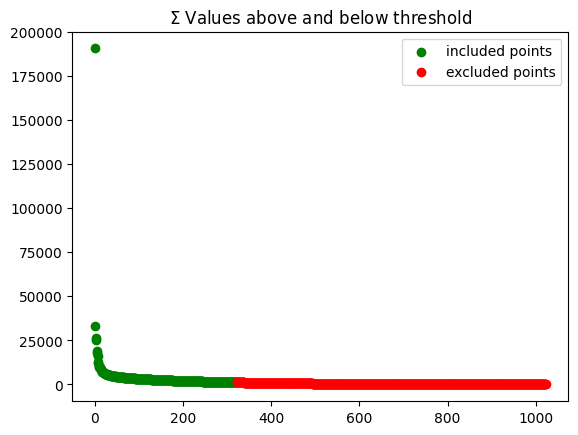

In [8]:
plt.title("$\Sigma$ Values above and below threshold")

plt.scatter(x1, y1, color='green', label='included points')
plt.scatter(x2, y2, color='red', label='excluded points')
plt.legend()
plt.show()

In [9]:
S_red = np.concatenate((y1,np.zeros(len(y2))))

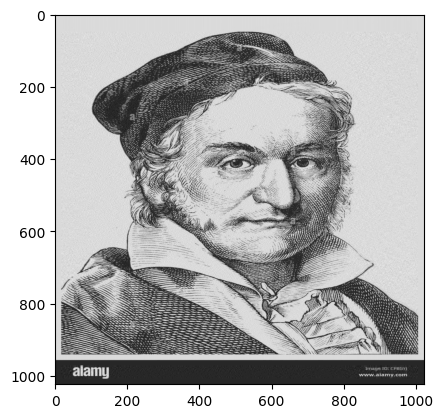

In [10]:
new_mat = U @ np.diag(S_red) @ VT
plt.imshow(new_mat, cmap='gray')

In [11]:
def frob(A, B):
    sum = 0.0
    for i in range(len(A)):
        for j in range(len(A[0])):
            sum += (A[i][j] - B[i][j]) ** 2
    return np.sqrt(sum)

In [12]:
error = frob(new_mat, mat)
error

np.float64(12481.661373812994)

In [13]:
def recon_error(num_nonzero):
    orig = np.array(grayscale)
    U1, S1, VT1 = np.linalg.svd(orig)
    S_dropped = np.zeros(1024)
    S_dropped[:num_nonzero] = S1[:num_nonzero]
    recon_matrix = U1 @ np.diag(S_dropped) @ VT1
    print("Done: " + str(num_nonzero))
    return (frob(recon_matrix, orig), recon_matrix)

In [28]:
x2 = range(1, 1024, 38)
yi2 = [recon_error(e) for e in x2]
y2, i2 = (map(list, zip(*yi2)))

Done: 1
Done: 39
Done: 77
Done: 115
Done: 153
Done: 191
Done: 229
Done: 267
Done: 305
Done: 343
Done: 381
Done: 419
Done: 457
Done: 495
Done: 533
Done: 571
Done: 609
Done: 647
Done: 685
Done: 723
Done: 761
Done: 799
Done: 837
Done: 875
Done: 913
Done: 951
Done: 989


Text(0, 0.5, 'Frobenius Error')

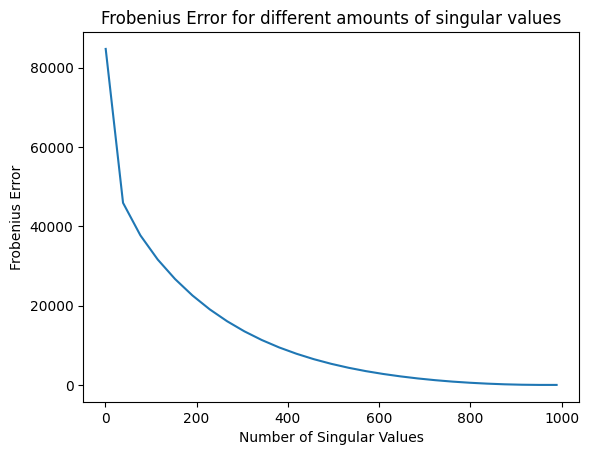

In [32]:
plt.title("Frobenius Error for different amounts of singular values")
plt.plot(x2, y2)
plt.xlabel("Number of Singular Values")

plt.ylabel("Frobenius Error")

In [30]:
y3 = y2[0::3]
x3 = x2[0::3]
i3 = i2[0::3]
cols = 3
rows = int(np.ceil(len(y3)/3))
rows, cols

(3, 3)

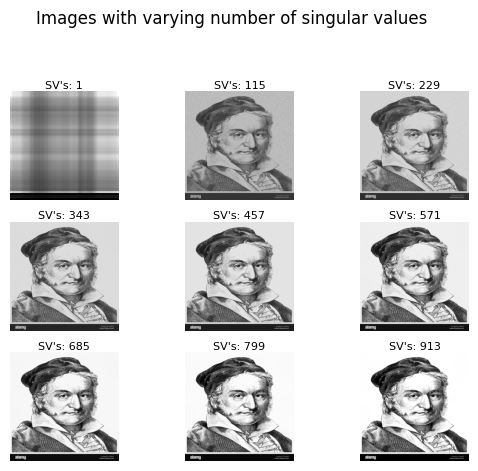

In [42]:

fig, axs = plt.subplots(rows, cols)
axs = axs.flatten()
fig.suptitle("Images with varying number of singular values", y=1.05)
for i, img in enumerate(i3):
    axs[i].axis("off")
    axs[i].set_title(f"SV's: {x3[i]}", fontsize='8', y=0.95)
    axs[i].imshow(img, cmap = 'gray')